### Table of Contents

1. Introduction
2. Importing Required Libraries
3. Loading the Dataset
4. Exploratory Data Analysis (EDA)
5. Feature and Target Definition
6. Train-Test Split
7. Model Training
8. Prediction and Evaluation
9. Visualization of Results
10. Conclusion



### **Project: Predicting Sales Using Advertising Dataset**

This project focuses on developing a **Linear Regression model** to predict product **Sales** based on advertising investments across different media channels — **TV**, **Radio**, and **Newspaper**.

We begin by loading and exploring the dataset (`advertising_dataset.csv`), followed by visualizing key relationships to uncover patterns. Then, we build and train the regression model, make predictions on unseen data, and evaluate the model’s accuracy using metrics like **Mean Squared Error (MSE)** and **R² Score**.

The goal is to understand how different advertising strategies impact sales and to provide actionable insights for optimizing marketing budgets.


### Import Required Libraries
This cell imports the necessary libraries:
pandas and numpy for data handling
matplotlib and seaborn for plotting
scikit-learn for model building and evaluation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


### Load and Display the Dataset and Dataset Summary and Info
Loads the dataset from your local system.
head() shows the first 5 rows to preview the structure.
info() shows data types and missing values.
describe() gives basic statistics like mean, std, min, max, etc., for each numeric column.

In [6]:
df = pd.read_csv('/Users/orpitadas/Downloads/advertising_dataset.csv')

# Display the first few rows
df.head()

# Check for nulls and types
df.isnull().sum()

# Summary statistics
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Exploratory Data Analysis (EDA)
This heatmap shows how each feature correlates with others. For example:
TV and radio are positively correlated with sales.
Newspaper has a weaker correlation.

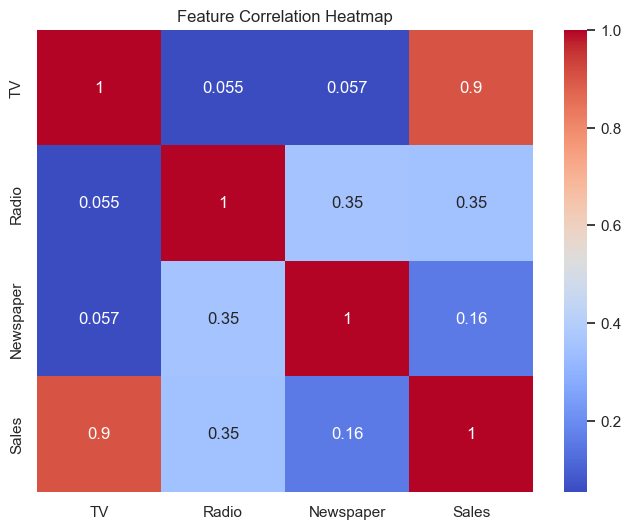

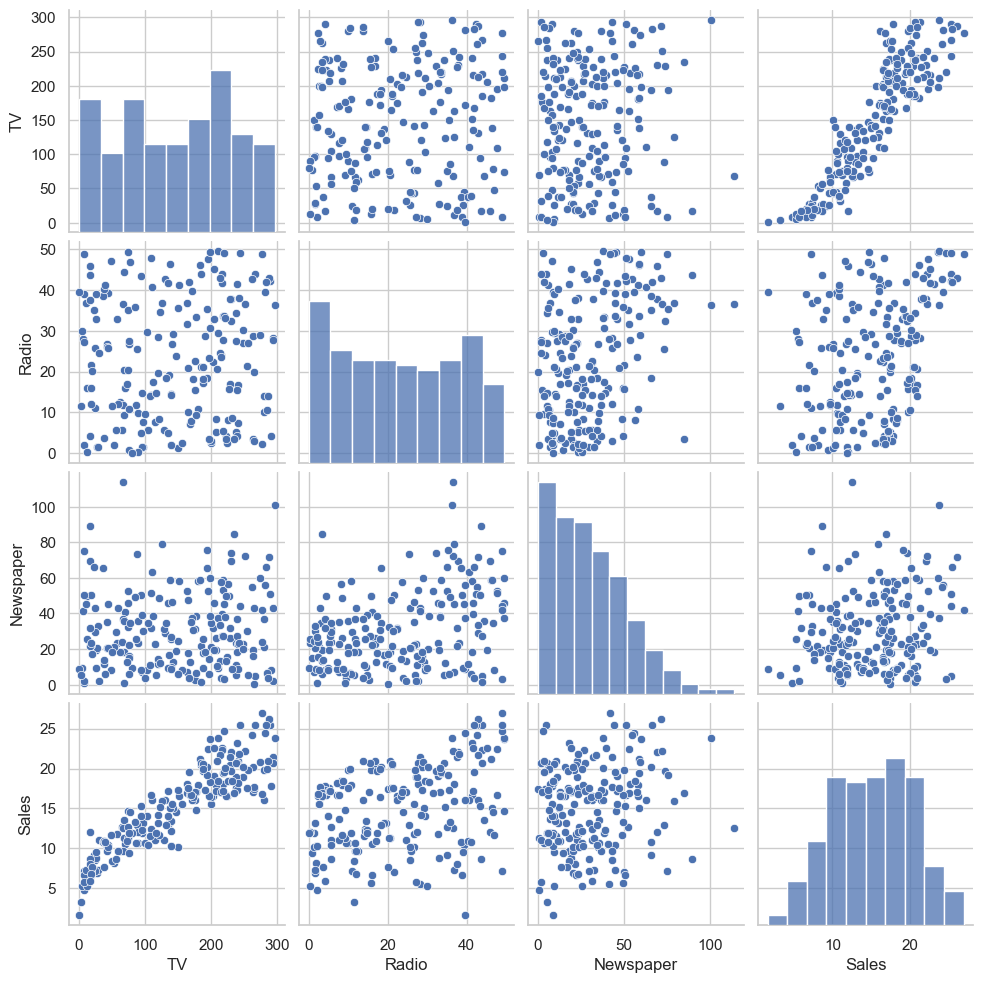

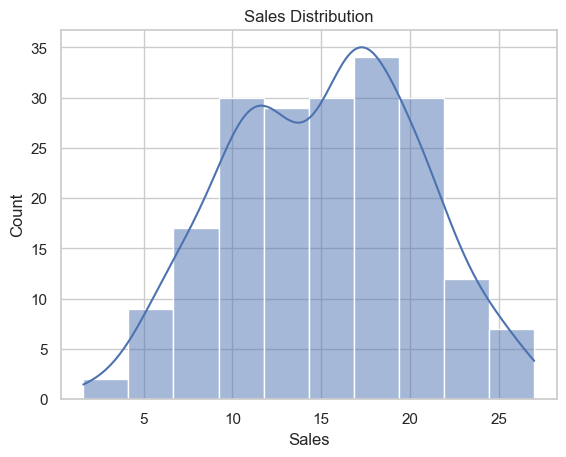

In [7]:
import matplotlib.pyplot as plt
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()

# Sales distribution
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()


### Model Building and Evaluation using Linear Regression
In this section, we prepare the data, train a Linear Regression model, and evaluate its performance:
Features (X) include advertising budgets for TV, Radio, and Newspaper.
Target (y) is the Sales we aim to predict.
The dataset is split into 80% training and 20% testing to validate the model, with random_state=42 for reproducibility.
We fit the model to the training data so it learns the relationship between ad spend and sales.
Predictions are made on the test set and evaluated using metrics like Mean Squared Error (MSE) and R² Score, which measure accuracy and how well the model explains sales variance.
Mean Squared Error (MSE): Average of squared differences between predicted and actual values. Lower is better.
R² Score (R-squared): Indicates how well the model explains the variance in the target variable. Ranges from 0 to 1. Closer to 1 means a better fit.


In [8]:
# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))



Mean Squared Error: 2.91
R² Score: 0.91


### Visualize Actual vs Predicted Sales
This scatter plot helps us visually assess the accuracy of the Linear Regression model:
Each point represents a prediction vs the actual sales value.The red dashed line (r--) is the ideal line where predicted values would equal actual values.
The closer the points are to this line, the better the model's predictions. Deviations from the line indicate prediction errors.
A tight clustering of points around the diagonal line suggests the model is performing well. Large scatter would indicate that the model may not be capturing the underlying patterns in the data accurately.

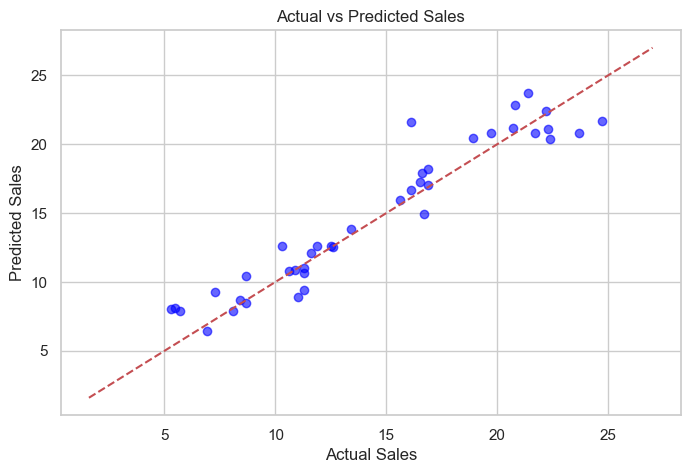

In [9]:
# Visualize Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


### **In Summation: Insights and Outcome**

This project effectively demonstrates how advertising investments in different media channels — **TV**, **Radio**, and **Newspaper** — influence **Sales**. By applying a **Linear Regression model**, we were able to predict sales outcomes with reasonable accuracy.

**Key takeaways include:**

- **TV and Radio** advertising have the strongest positive correlation with sales.
- **Newspaper** advertising shows the weakest impact among the three.
- The **model achieved a strong R² score**, indicating that a significant proportion of the variability in sales can be explained by the input features.

The final visualization of **Actual vs Predicted Sales** shows a fairly linear alignment, affirming the reliability of the model.

This analysis provides valuable insights for marketers to optimize their budget allocation, suggesting a greater focus on **TV and Radio** for maximizing returns.
